In [27]:
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen

In [28]:
url_base = 'https://movie.naver.com/'
url_sub = 'movie/sdb/rank/rmovie.naver?sel=cur&date=20220401'

page = urlopen(url_base + url_sub)
soup = BeautifulSoup(page, 'html.parser')

In [29]:
date = pd.date_range('2022-04-01', periods=100, freq='D')

In [77]:
import urllib
import tqdm

movie_date = []
movie_name = []
movie_point = []
for today in tqdm.tqdm(date):
    url = url_base + 'movie/sdb/rank/rmovie.naver?sel=cur&date={date}'.format(date=urllib.parse.quote(today.strftime('%Y%m%d')))
    response = urlopen(url)
    soup = BeautifulSoup(response, 'html.parser')

    soup.find_all('div', 'tit5')[0].a.string
    soup.find_all('td', 'point')[0].string
    
    end = len(soup.find_all('div', 'tit5'))
    movie_date.extend([today for i in range(end)])
    movie_name.extend([soup.find_all('div', 'tit5')[i].a.string for i in range(end)])
    movie_point.extend([soup.find_all('td', 'point')[i].string for i in range(end)])

    

100%|██████████| 100/100 [00:43<00:00,  2.30it/s]


In [78]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 'point':movie_point})
movie['point'] = movie['point'].astype(float)

In [79]:
# 1.
movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.mean)
movie_unique.sort_values(by='point', ascending=False, inplace=True)
top5_movies = list(movie_unique.head(5).index)
print (top5_movies)

['탑건: 매버릭', '범죄도시2', '씽2게더', '시네마 천국', '언터처블: 1%의 우정']


In [ ]:
# 2.

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path='C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)
rc('font', size=13)

In [81]:
movie_pivot = pd.pivot_table(movie, index=['date'], columns=['name'], values=['point'])
movie_pivot.columns = movie_pivot.columns.droplevel()

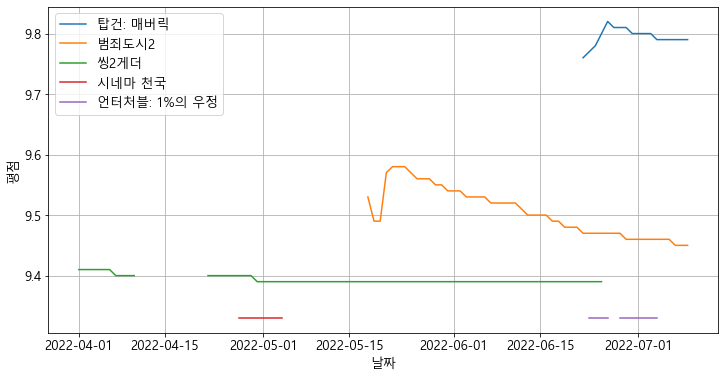

In [82]:
plt.figure(figsize=(12,6))
plt.plot(movie_pivot[top5_movies])
plt.legend(top5_movies, loc='best')
plt.xlabel('날짜'); plt.ylabel('평점')
plt.grid()
plt.show()